<a href="https://colab.research.google.com/github/thaisviana/Bootcamp-Ciencia-de-Dados/blob/master/kaggle_house.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##House Prices: 
* [house-prices kaggle Competition](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype

##  Importação dos Dados



In [0]:
train = pd.read_csv("train.csv")
y = train.copy().SalePrice
X = train.copy().drop(['SalePrice', 'Id'], axis=1)
y = np.log(train.copy().SalePrice)

### Observação da várivel de Target
> Gráfico de densidade dos valores contínuos usando [displot](https://seaborn.pydata.org/generated/seaborn.distplot.html)

> Indented block



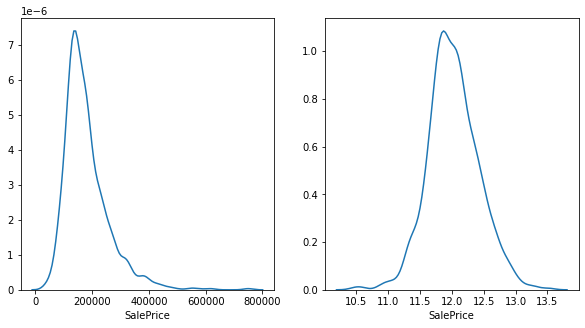

In [74]:
import seaborn as sns
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))
fig.subplots_adjust(hspace=0.2)
sns.distplot(train.copy().SalePrice, ax=axes[0], hist=False)
sns.distplot(np.log(train.copy().SalePrice), ax=axes[1], hist=False)


### Observação das colunas elegíveis ao treinamento

In [75]:
X.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


### Observação das colunas numéricas elegíveis ao treinamento

In [76]:
for n,col in X.items():
  if is_numeric_dtype(col):
    print(n, col.dtype, col.isna().sum(), col.isnull().sum())

MSSubClass int64 0 0
LotFrontage float64 259 259
LotArea int64 0 0
OverallQual int64 0 0
OverallCond int64 0 0
YearBuilt int64 0 0
YearRemodAdd int64 0 0
MasVnrArea float64 8 8
BsmtFinSF1 int64 0 0
BsmtFinSF2 int64 0 0
BsmtUnfSF int64 0 0
TotalBsmtSF int64 0 0
1stFlrSF int64 0 0
2ndFlrSF int64 0 0
LowQualFinSF int64 0 0
GrLivArea int64 0 0
BsmtFullBath int64 0 0
BsmtHalfBath int64 0 0
FullBath int64 0 0
HalfBath int64 0 0
BedroomAbvGr int64 0 0
KitchenAbvGr int64 0 0
TotRmsAbvGrd int64 0 0
Fireplaces int64 0 0
GarageYrBlt float64 81 81
GarageCars int64 0 0
GarageArea int64 0 0
WoodDeckSF int64 0 0
OpenPorchSF int64 0 0
EnclosedPorch int64 0 0
3SsnPorch int64 0 0
ScreenPorch int64 0 0
PoolArea int64 0 0
MiscVal int64 0 0
MoSold int64 0 0
YrSold int64 0 0


### Observação das colunas categóricas elegíveis ao treinamento

In [77]:
for n,col in X.items():
  if not is_numeric_dtype(col):
    print(n, col.dtype, col.isna().sum(), col.isnull().sum())

MSZoning object 0 0
Street object 0 0
Alley object 1369 1369
LotShape object 0 0
LandContour object 0 0
Utilities object 0 0
LotConfig object 0 0
LandSlope object 0 0
Neighborhood object 0 0
Condition1 object 0 0
Condition2 object 0 0
BldgType object 0 0
HouseStyle object 0 0
RoofStyle object 0 0
RoofMatl object 0 0
Exterior1st object 0 0
Exterior2nd object 0 0
MasVnrType object 8 8
ExterQual object 0 0
ExterCond object 0 0
Foundation object 0 0
BsmtQual object 37 37
BsmtCond object 37 37
BsmtExposure object 38 38
BsmtFinType1 object 37 37
BsmtFinType2 object 38 38
Heating object 0 0
HeatingQC object 0 0
CentralAir object 0 0
Electrical object 1 1
KitchenQual object 0 0
Functional object 0 0
FireplaceQu object 690 690
GarageType object 81 81
GarageFinish object 81 81
GarageQual object 81 81
GarageCond object 81 81
PavedDrive object 0 0
PoolQC object 1453 1453
Fence object 1179 1179
MiscFeature object 1406 1406
SaleType object 0 0
SaleCondition object 0 0


## Limpeza de dados

#### Limpando valores nulos ou NaN [Missing]

In [0]:
#categoricos
for n,col in X.items():
  if not is_numeric_dtype(col):
    X[n].fillna('Other', inplace=True)

In [0]:
#numericos
for n,col in X.items():
  if is_numeric_dtype(col):
    X[f"{n}_isnull"] = X[n].isna()
    X[n].fillna((X[n].mean(skipna=True)), inplace=True)

#### Transformando colunas do tipo string no tipo categorias do pandas
> + substituindo os labels pelos codes

In [0]:
def train_cats(df):
    """Change any columns of strings in a panda's dataframe to a column of
    categorical values. This applies the changes inplace.
    """
    for n,c in df.items():
        if is_string_dtype(c): df[n] = c.astype('category').cat.as_ordered()

In [0]:
train_cats(X)
for n,col in X.items():
  if not is_numeric_dtype(col):
    X[n] = X[n].cat.codes

In [82]:
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,...,MoSold,YrSold,SaleType,SaleCondition,MSSubClass_isnull,LotFrontage_isnull,LotArea_isnull,OverallQual_isnull,OverallCond_isnull,YearBuilt_isnull,YearRemodAdd_isnull,MasVnrArea_isnull,BsmtFinSF1_isnull,BsmtFinSF2_isnull,BsmtUnfSF_isnull,TotalBsmtSF_isnull,1stFlrSF_isnull,2ndFlrSF_isnull,LowQualFinSF_isnull,GrLivArea_isnull,BsmtFullBath_isnull,BsmtHalfBath_isnull,FullBath_isnull,HalfBath_isnull,BedroomAbvGr_isnull,KitchenAbvGr_isnull,TotRmsAbvGrd_isnull,Fireplaces_isnull,GarageYrBlt_isnull,GarageCars_isnull,GarageArea_isnull,WoodDeckSF_isnull,OpenPorchSF_isnull,EnclosedPorch_isnull,3SsnPorch_isnull,ScreenPorch_isnull,PoolArea_isnull,MiscVal_isnull,MoSold_isnull,YrSold_isnull
0,60,3,65.0,8450,1,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,4,3,2,706,6,0,150,856,1,0,...,2,2008,8,4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,20,3,80.0,9600,1,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,4,1,0,978,6,0,284,1262,1,0,...,5,2007,8,4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,60,3,68.0,11250,1,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,4,2,2,486,6,0,434,920,1,0,...,9,2008,8,4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,70,3,60.0,9550,1,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,3,4,0,4,1,3,0,216,6,0,540,756,1,2,...,2,2006,8,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,60,3,84.0,14260,1,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,4,0,2,655,6,0,490,1145,1,0,...,12,2008,8,4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,62.0,7917,1,1,3,3,0,4,0,8,2,2,0,5,6,5,1999,2000,1,1,12,13,2,0.0,3,4,2,2,4,3,6,0,6,0,953,953,1,0,...,8,2007,8,4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1456,20,3,85.0,13175,1,1,3,3,0,4,0,14,2,2,0,2,6,6,1978,1988,1,1,9,10,4,119.0,3,4,1,2,4,3,0,790,5,163,589,1542,1,4,...,2,2010,8,4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1457,70,3,66.0,9042,1,1,3,3,0,4,0,6,2,2,0,5,7,9,1941,2006,1,1,5,5,2,0.0,0,2,4,4,1,3,2,275,6,0,877,1152,1,0,...,5,2010,8,4,False,False,False,False,False,False,False,False,False,False,False,Fals

### Observando a correlação estátistica entre as colunas

A função .corr() do pandas calcula a correlação das colunas par a par excluindo valores nulos. O método default de cálculo é a correlação de [Pearson](https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de_Pearson).

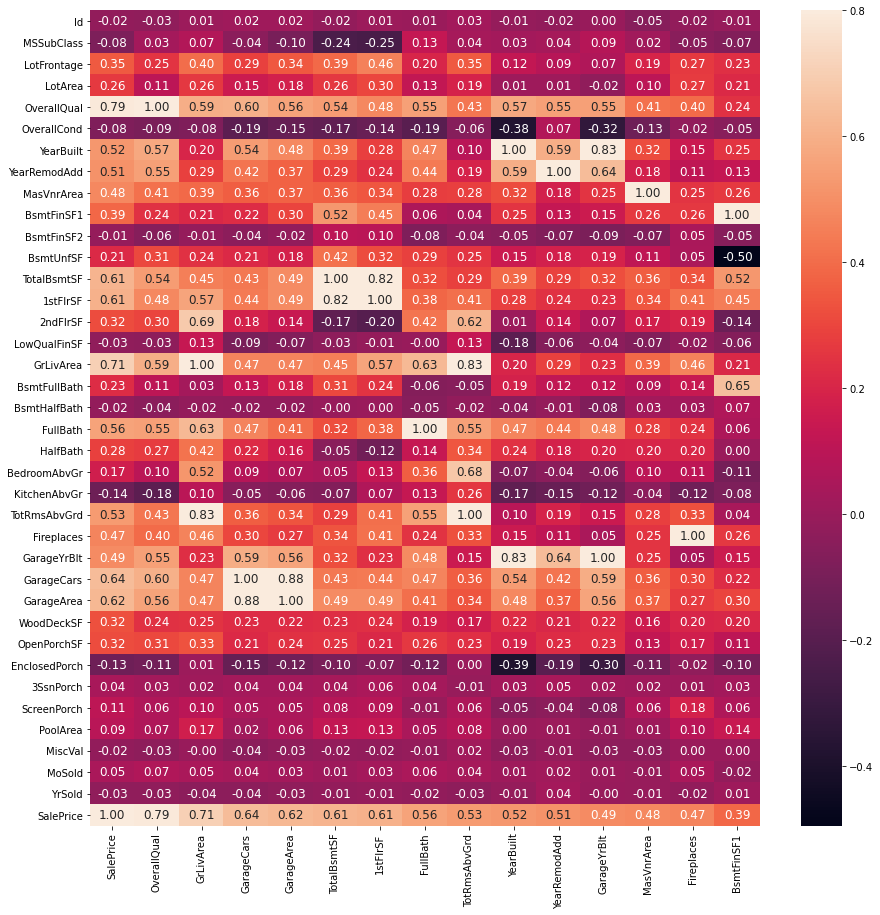

In [83]:
import seaborn as sns
n=15
corr_train= train.corr()
top15_cols=corr_train.nlargest(n,'SalePrice')['SalePrice'].index
fig1,ax1=plt.subplots(figsize=(15,15))
sns.heatmap(corr_train[top15_cols],vmax=.8, square=False,ax=ax1,annot=True, fmt='.2f', annot_kws={'size': 12})

### Colunas com maiores correlações estatísticas no conjunto de treinamento com a váriavel target

In [84]:
top15_cols[1:]

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd',
       'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1'],
      dtype='object')

## Classificação e Regressão

In [0]:
import random
ys = []
for i in range(1):
  r = random.randint(0,100)
  X_train, X_test, y_train, y_test = train_test_split(X[top15_cols[1:]], y, test_size=0.30, random_state=r)
  clf = KNeighborsRegressor(13, weights='distance')
  y = clf.fit(X_train, y_train)
  y_chapeu= clf.predict(X_test)
  ys.append(y_chapeu)

In [86]:
ys = np.array(ys)
ys

array([[11.7098061 , 12.18378095, 12.00587222, 12.19517165, 11.83816994,
        12.00386146, 12.15524293, 12.44436952, 11.45524488, 11.98721622,
        12.15124566, 12.02564075, 12.0378355 , 12.28722318, 11.72996161,
        11.71691572, 12.1457318 , 11.64822099, 11.81268003, 11.69981805,
        12.10536488, 11.65761836, 12.11318308, 11.91202478, 12.11936069,
        11.73822166, 11.16001315, 11.70247611, 12.08700784, 11.77340194,
        11.99103336, 12.1880073 , 12.40718204, 11.31638378, 11.68458471,
        11.46091188, 11.75579089, 11.66975151, 12.27048537, 11.68565611,
        12.68641649, 12.2050509 , 12.11573131, 11.63355023, 11.78716795,
        11.36531262, 12.5523169 , 11.89774196, 11.76974702, 11.30940961,
        12.27985082, 11.72454676, 12.60258915, 12.07685442, 11.8762015 ,
        11.76198142, 11.34341647, 12.02975869, 11.92349974, 12.78726741,
        11.91006743, 12.42685834, 11.85698712, 11.77958413, 11.99073807,
        12.2291612 , 11.76138031, 11.59805853, 12.2

### Escolhendo o número de vizinhos
### O parâmetro de cálculo de distância

## Calculando o Erro
> RMSE [Root Mean Square Deviation](https://en.wikipedia.org/wiki/Root-mean-square_deviation)

In [87]:
import math

def rmse(x,y): return math.sqrt(((x-y)**2).mean())


def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_test), y_test)]
    print(res)
print_score(clf)

[0.002788916378913869, 0.20832590528670114]
